In [18]:
import pandas as pd 
df=pd.read_csv("/home/fatma/Téléchargements/database_final.csv" , sep='|')

/tmp/ipykernel_23892/1331627097.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/home/fatma/Téléchargements/database_final.csv" , sep='|')


In [2]:
df.columns

Index(['id', 'ip_address', 'endpoint', 'response_status', 'response_body',
       'requested_at', 'created_at', 'updated_at', 'request_body',
       'request_technologies', 'response_technologies', 'longitude',
       'latitude', 'response_extracted_technologies', 'response_offers',
       'request_extracted_technologies', 'requested_offers'],
      dtype='object')

In [6]:

# Remplacer les valeurs
df['response_extracted_technologies'] = df['response_extracted_technologies'].replace('Fixe JDID 5G', 'Fixe JDID')
df['response_extracted_technologies'] = df['response_extracted_technologies'].replace('Fixe JDID 4G', 'Fixe JDID')

# Sauvegarder le fichier modifié
df.to_csv("/home/fatma/Téléchargements/data_extracted_fixe.csv" , sep='|', index=False)


In [7]:
df=pd.read_csv("/home/fatma/Téléchargements/data_extracted_fixe.csv" , sep='|')

/tmp/ipykernel_18918/3005496927.py:1: DtypeWarning: Columns (10,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/home/fatma/Téléchargements/data_extracted_fixe.csv" , sep='|')


In [3]:
print(df['response_extracted_technologies'].unique())

['Fixe JDID' '4G' nan 'Fixe JDID, Fixe JDID'
 'Fixe JDID, Fixe JDID, 5G BOX' 'Fixe JDID, Fixe JDID, Fibre'
 '5G BOX, Fixe JDID, Fixe JDID, Fibre'
 'Fixe JDID, 5G BOX, Fixe JDID, Fibre'
 'Fibre, Fixe JDID, Fixe JDID, 5G BOX' '4G, Fixe JDID' 'Fixe JDID, Fibre'
 'Fibre' '4G, Fixe JDID, Fibre' 'Fixe JDID, 5G BOX' '4G, Fibre'
 '5G BOX, Fixe JDID, Fibre' 'Fibre, Fixe JDID, 5G BOX' '5G BOX']


In [11]:
import pandas as pd

# Charger les données
# df = pd.read_csv('ton_fichier.csv')

# Mise en minuscule pour nettoyage
df['response_extracted_technologies'] = df['response_extracted_technologies'].str.lower()

# Convertir la colonne 'requested_at' en datetime si nécessaire
df['requested_at'] = pd.to_datetime(df['requested_at'], errors='coerce')

# Extraire la date
df['jour'] = df['requested_at'].dt.date

# Comptage des technologies
df['count_fixe_jdid'] = df['response_extracted_technologies'].str.contains(r'fixe jdid', case=False, regex=True).astype(float)
df['count_4g'] = df['response_extracted_technologies'].str.contains(r'\b4g\b', case=False, regex=True).astype(float)
df['count_5g_box'] = df['response_extracted_technologies'].str.contains(r'5g.*box', case=False, regex=True).astype(float)
df['count_fibre'] = df['response_extracted_technologies'].str.contains(r'fibre', case=False, regex=True).astype(float)

# Remplir les NaN avec 0 pour éviter les erreurs de conversion
df['count_fixe_jdid'] = df['count_fixe_jdid'].fillna(0).round().astype(int)
df['count_4g'] = df['count_4g'].fillna(0).round().astype(int)
df['count_5g_box'] = df['count_5g_box'].fillna(0).round().astype(int)
df['count_fibre'] = df['count_fibre'].fillna(0).round().astype(int)

# Groupe par jour et somme chaque techno
df_counts = df.groupby('jour')[['count_fixe_jdid', 'count_4g', 'count_5g_box', 'count_fibre']].sum().reset_index()

# Afficher les premiers résultats
print(df_counts.head())
print(len(df_counts))


         jour  count_fixe_jdid  count_4g  count_5g_box  count_fibre
0  2024-09-04               36       110             0           20
1  2024-09-05             8328      6161             0          894
2  2024-09-06             8028      6481             0          837
3  2024-09-07             6070     11005             0          609
4  2024-09-08              958       862             0           88
177


In [22]:
# Sauvegarder le DataFrame dans un fichier CSV
df_counts.to_csv('/home/fatma/Téléchargements/df_counts.csv',sep='|', index=False)


In [20]:
import pandas as pd

# Charger les données
# df = pd.read_csv('ton_fichier.csv')

# Mise en minuscule pour nettoyage
df['response_extracted_technologies'] = df['response_extracted_technologies'].str.lower()

# Convertir la colonne 'requested_at' en datetime si nécessaire
df['requested_at'] = pd.to_datetime(df['requested_at'], errors='coerce')

# Extraire la date et l'heure
df['jour'] = df['requested_at'].dt.date
df['heure'] = df['requested_at'].dt.hour

# Comptage des technologies
df['count_fixe_jdid'] = df['response_extracted_technologies'].str.contains(r'fixe jdid', case=False, regex=True).astype(float)
df['count_4g'] = df['response_extracted_technologies'].str.contains(r'\b4g\b', case=False, regex=True).astype(float)
df['count_5g_box'] = df['response_extracted_technologies'].str.contains(r'5g.*box', case=False, regex=True).astype(float)
df['count_fibre'] = df['response_extracted_technologies'].str.contains(r'fibre', case=False, regex=True).astype(float)

# Remplir les NaN avec 0 pour éviter les erreurs de conversion
df['count_fixe_jdid'] = df['count_fixe_jdid'].fillna(0).round().astype(int)
df['count_4g'] = df['count_4g'].fillna(0).round().astype(int)
df['count_5g_box'] = df['count_5g_box'].fillna(0).round().astype(int)
df['count_fibre'] = df['count_fibre'].fillna(0).round().astype(int)

# Groupe par jour et heure et somme chaque techno
df_counts = df.groupby(['jour', 'heure'])[['count_fixe_jdid', 'count_4g', 'count_5g_box', 'count_fibre']].sum().reset_index()

# Afficher les premiers résultats
print(df_counts.head())
print(len(df_counts))



         jour  heure  count_fixe_jdid  count_4g  count_5g_box  count_fibre
0  2024-09-04   21.0               14        19             0           20
1  2024-09-04   22.0               22        91             0            0
2  2024-09-05    6.0                8        24             0            0
3  2024-09-05    7.0              101       130             0            0
4  2024-09-05    8.0              456       450             0          105
3376


In [21]:
# Sauvegarder le DataFrame dans un fichier CSV
df_counts.to_csv('/home/fatma/Téléchargements/df_counts.csv',sep='|', index=False)


In [19]:
import pandas as pd

# Charger les données
# df = pd.read_csv('ton_fichier.csv')

# Mise en minuscule pour nettoyage
df['response_extracted_technologies'] = df['response_extracted_technologies'].str.lower()

# Convertir la colonne 'requested_at' en datetime si nécessaire
df['requested_at'] = pd.to_datetime(df['requested_at'], errors='coerce')

# Extraire la date, l'heure et la minute
df['jour'] = df['requested_at'].dt.date
df['heure'] = df['requested_at'].dt.hour
df['minute'] = df['requested_at'].dt.minute

# Comptage des technologies
df['count_fixe_jdid'] = df['response_extracted_technologies'].str.contains(r'fixe jdid', case=False, regex=True).astype(float)
df['count_4g'] = df['response_extracted_technologies'].str.contains(r'\b4g\b', case=False, regex=True).astype(float)
df['count_5g_box'] = df['response_extracted_technologies'].str.contains(r'5g.*box', case=False, regex=True).astype(float)
df['count_fibre'] = df['response_extracted_technologies'].str.contains(r'fibre', case=False, regex=True).astype(float)

# Remplir les NaN avec 0 pour éviter les erreurs de conversion
df['count_fixe_jdid'] = df['count_fixe_jdid'].fillna(0).round().astype(int)
df['count_4g'] = df['count_4g'].fillna(0).round().astype(int)
df['count_5g_box'] = df['count_5g_box'].fillna(0).round().astype(int)
df['count_fibre'] = df['count_fibre'].fillna(0).round().astype(int)

# Groupe par jour, heure et minute, puis somme chaque techno
df_counts = df.groupby(['jour', 'heure', 'minute'])[['count_fixe_jdid', 'count_4g', 'count_5g_box', 'count_fibre']].sum().reset_index()

# Afficher les premiers résultats
print(df_counts.head())

# Afficher le nombre de lignes dans le DataFrame après regroupement
print(len(df_counts))


         jour  heure  minute  count_fixe_jdid  count_4g  count_5g_box  \
0  2024-09-04   21.0    40.0                2         3             0   
1  2024-09-04   21.0    46.0                1         0             0   
2  2024-09-04   21.0    47.0                0         2             0   
3  2024-09-04   21.0    50.0                0         9             0   
4  2024-09-04   21.0    51.0                0         0             0   

   count_fibre  
0            4  
1            1  
2            0  
3            5  
4            7  
131120


In [13]:
import pandas as pd 
df=pd.read_csv("/home/fatma/Téléchargements/df_counts.csv" , sep='|')

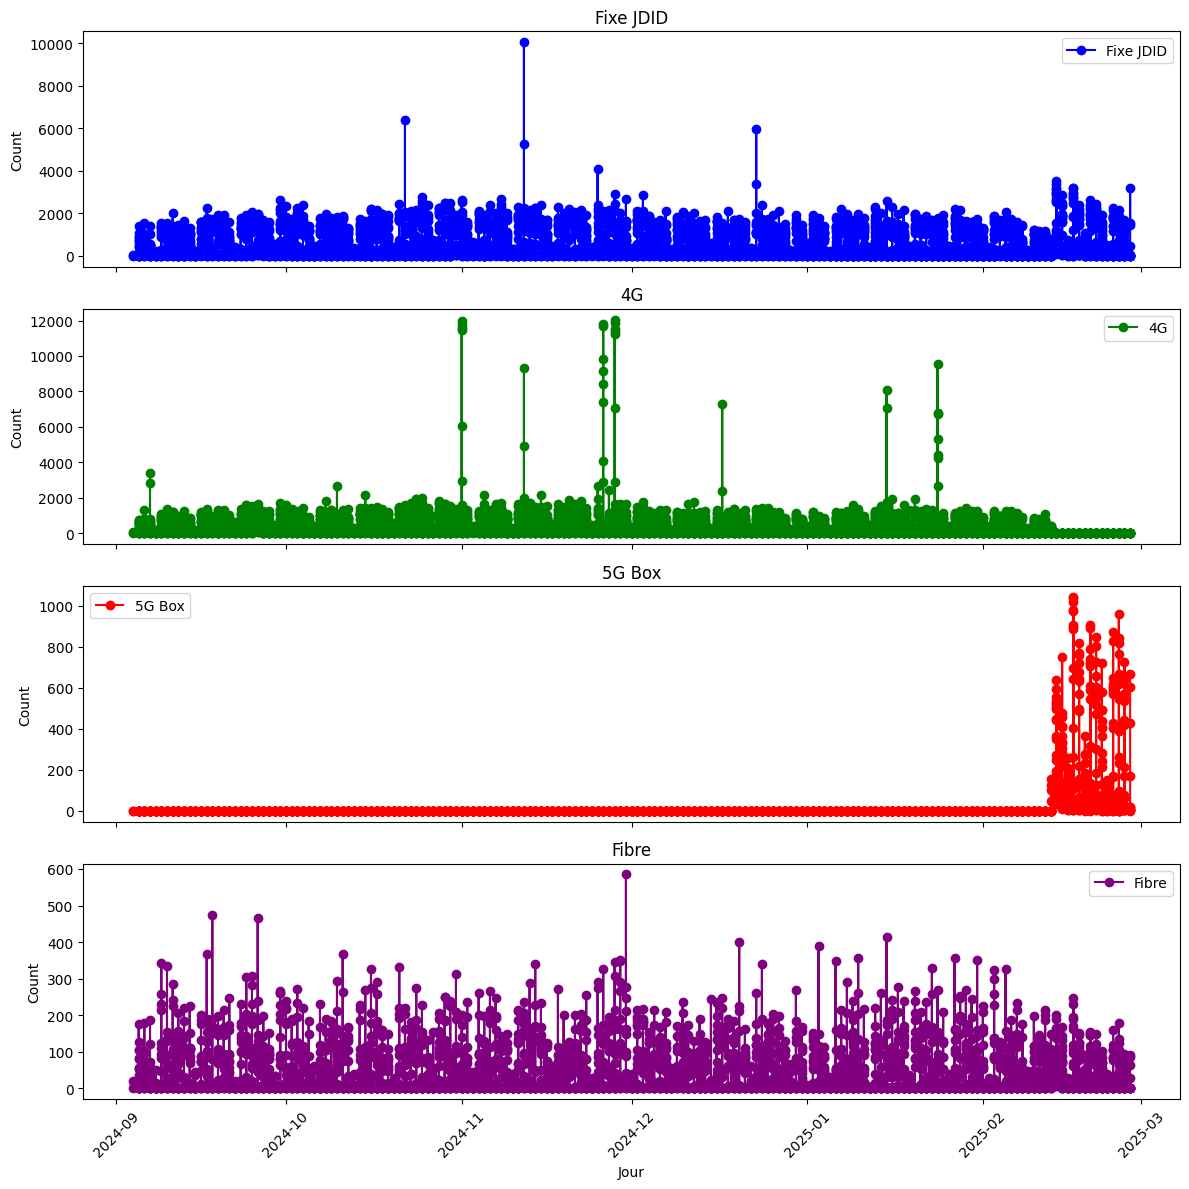

In [17]:
import matplotlib.pyplot as plt

# Create subplots (1 row, 4 columns)
fig, axs = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

# Plot for 'count_fixe_jdid'
axs[0].plot(df_counts['jour'], df_counts['count_fixe_jdid'], label='Fixe JDID', color='b', marker='o')
axs[0].set_ylabel('Count')
axs[0].set_title('Fixe JDID')
axs[0].legend()

# Plot for 'count_4g'
axs[1].plot(df_counts['jour'], df_counts['count_4g'], label='4G', color='g', marker='o')
axs[1].set_ylabel('Count')
axs[1].set_title('4G')
axs[1].legend()

# Plot for 'count_5g_box'
axs[2].plot(df_counts['jour'], df_counts['count_5g_box'], label='5G Box', color='r', marker='o')
axs[2].set_ylabel('Count')
axs[2].set_title('5G Box')
axs[2].legend()

# Plot for 'count_fibre'
axs[3].plot(df_counts['jour'], df_counts['count_fibre'], label='Fibre', color='purple', marker='o')
axs[3].set_xlabel('Jour')
axs[3].set_ylabel('Count')
axs[3].set_title('Fibre')
axs[3].legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


Colonnes du DataFrame : Index(['jour', 'heure', 'count_fixe_jdid', 'count_4g', 'count_5g_box',
       'count_fibre'],
      dtype='object')


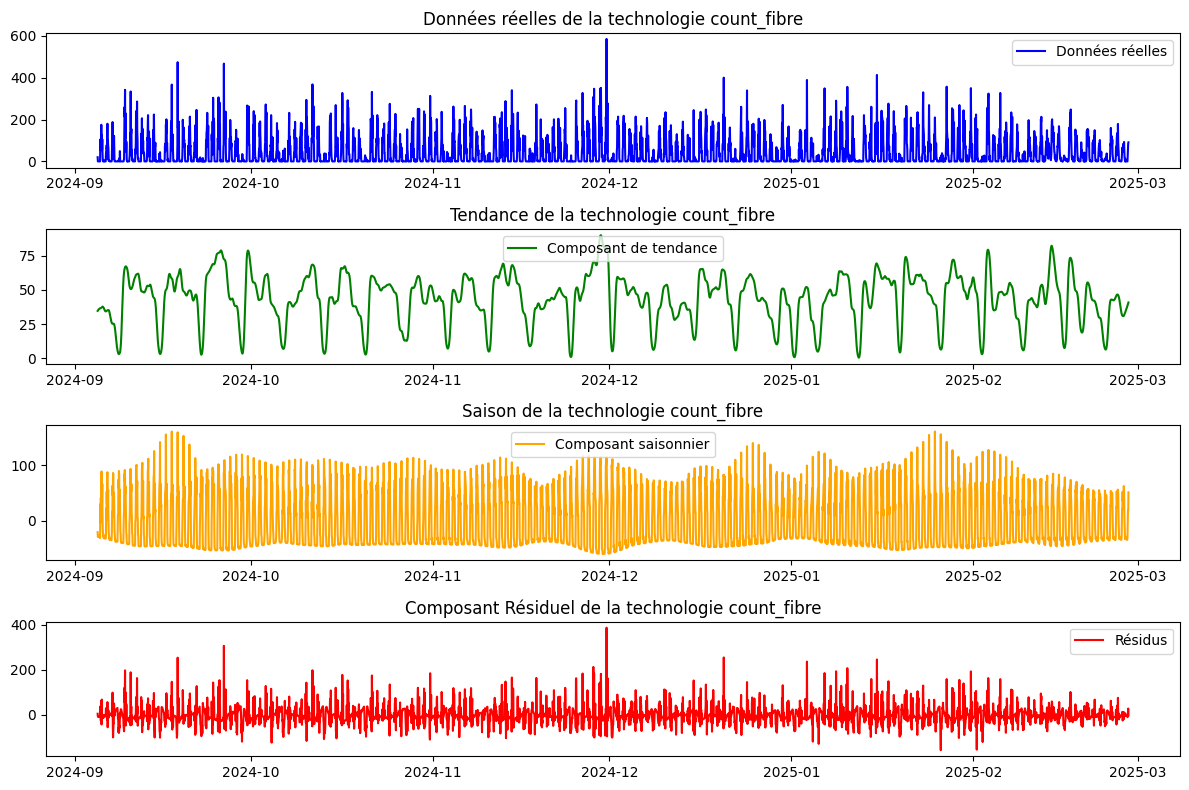

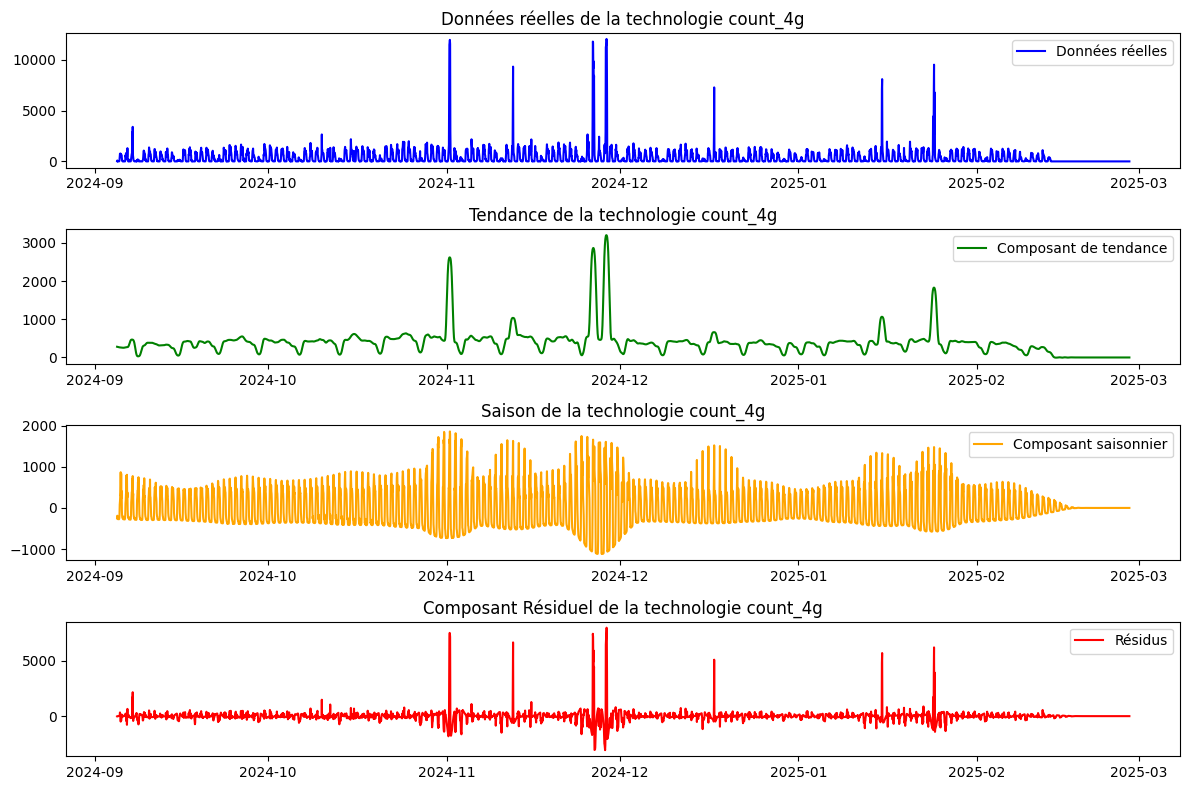

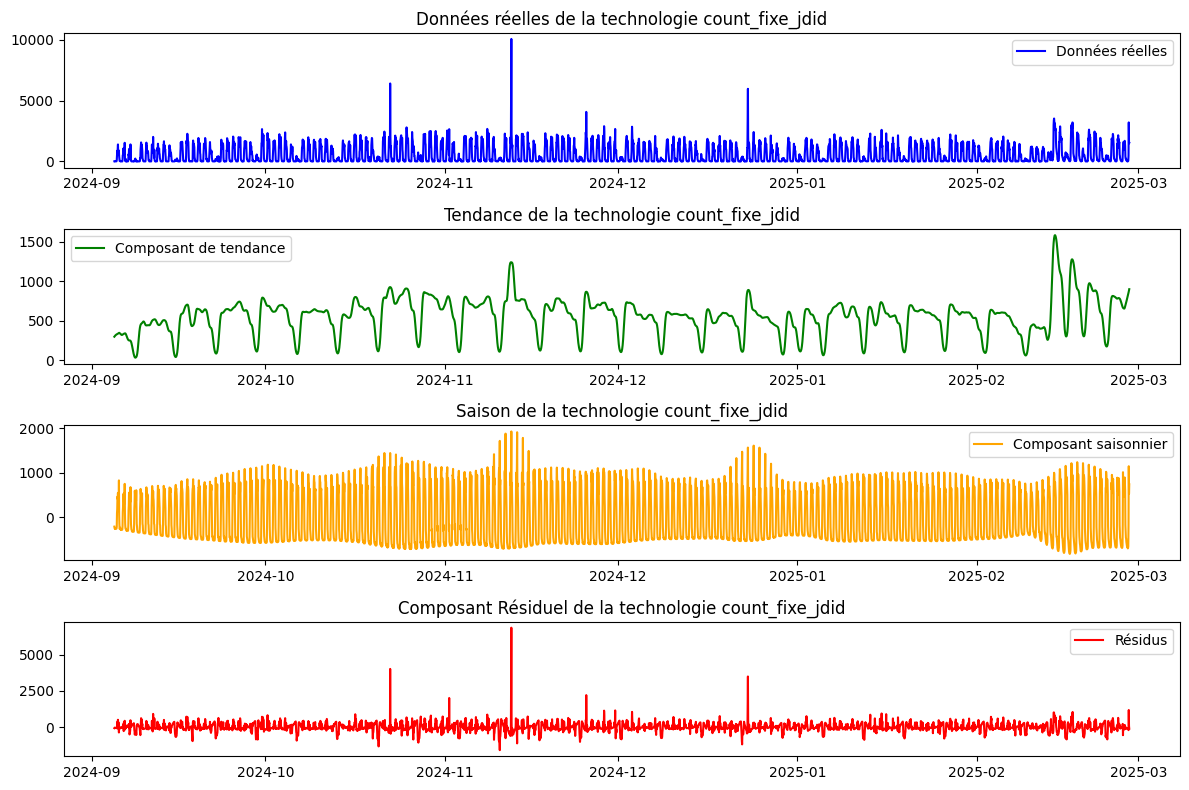

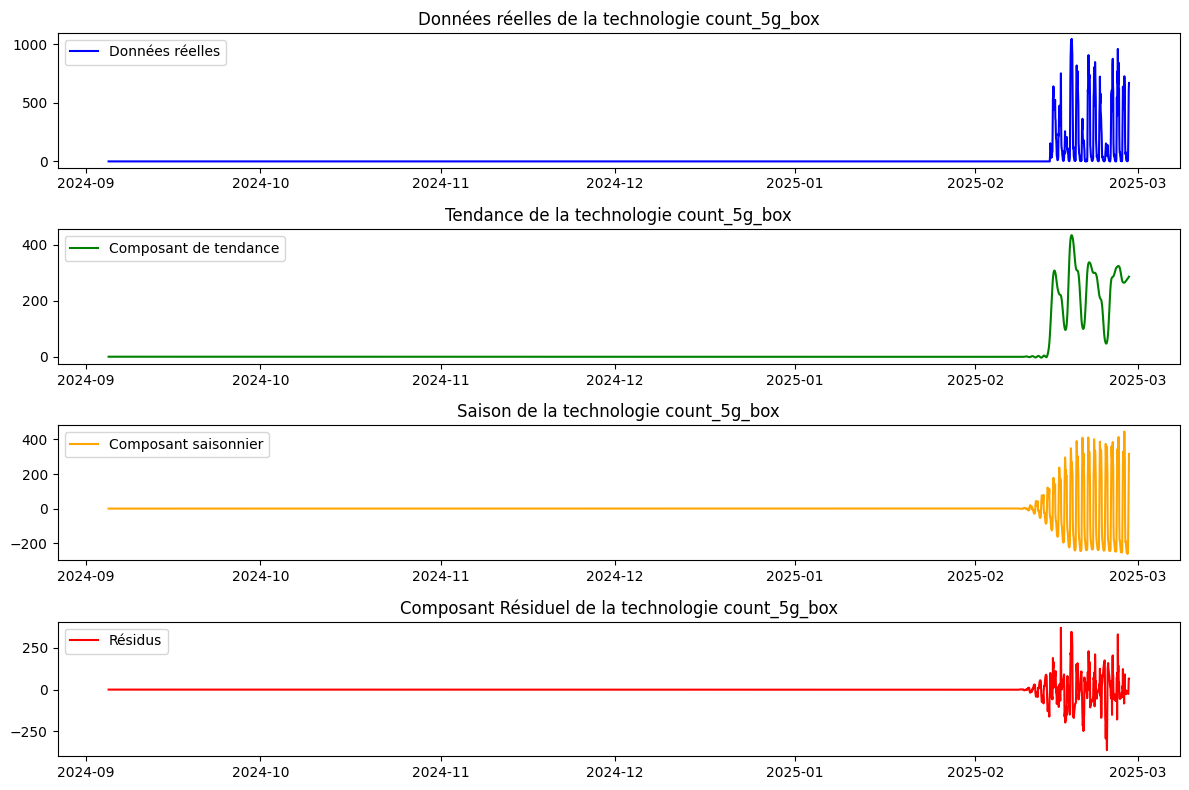

Analyse de la saisonnalité terminée.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Charger la base de données avec les colonnes 'jour', 'heure' et 'count' pour chaque technologie
df = pd.read_csv("/home/fatma/Téléchargements/df_counts.csv", sep='|')  # Vérifier les colonnes
print("Colonnes du DataFrame :", df.columns)

# Convertir 'jour' en format datetime et gérer 'heure'
df['jour'] = pd.to_datetime(df['jour'], errors='coerce')
df['date_heure'] = df.apply(lambda row: pd.to_datetime(f"{row['jour'].date()} {int(row['heure'])}:00:00"), axis=1)

# Supprimer les lignes où la date ou les valeurs sont manquantes
df = df.dropna(subset=['date_heure', 'count_fibre', 'count_4g', 'count_fixe_jdid', 'count_5g_box'])

# Liste des technologies
technologies = ['count_fibre', 'count_4g', 'count_fixe_jdid', 'count_5g_box']

# Boucle sur chaque technologie pour analyser la saisonnalité
for tech in technologies:
    # Sélectionner la colonne de la technologie
    df_tech = df[['date_heure', tech]].copy()
    
    # Compléter les dates manquantes pour chaque technologie
    date_min = df_tech['date_heure'].min()
    date_max = df_tech['date_heure'].max()
    date_range = pd.date_range(start=date_min, end=date_max, freq='H')  # Utilisation de la fréquence horaire

    df_tech = df_tech.set_index('date_heure').reindex(date_range).reset_index().rename(columns={"index": "date_heure"})
    df_tech['y'] = df_tech[tech].fillna(0).astype(int)  # Remplacer les valeurs manquantes par 0
    
    # Renommer la colonne 'date_heure' en 'ds' pour la décomposition
    df_tech = df_tech.rename(columns={"date_heure": "ds"})
    
    # Décomposition saisonnière (STL)
    stl = STL(df_tech['y'], period=24, seasonal=13)  # Période de 24 heures pour capturer les cycles journaliers
    result = stl.fit()
    
    # Extraire les composants de la décomposition
    trend = result.trend
    seasonal = result.seasonal
    residual = result.resid
    
    # Tracer la décomposition saisonnière
    plt.figure(figsize=(12, 8))
    plt.subplot(4, 1, 1)
    plt.plot(df_tech['ds'], df_tech['y'], label='Données réelles', color='blue')
    plt.title(f'Données réelles de la technologie {tech}')
    plt.legend()

    plt.subplot(4, 1, 2)
    plt.plot(df_tech['ds'], trend, label='Composant de tendance', color='green')
    plt.title(f'Tendance de la technologie {tech}')
    plt.legend()

    plt.subplot(4, 1, 3)
    plt.plot(df_tech['ds'], seasonal, label='Composant saisonnier', color='orange')
    plt.title(f'Saison de la technologie {tech}')
    plt.legend()

    plt.subplot(4, 1, 4)
    plt.plot(df_tech['ds'], residual, label='Résidus', color='red')
    plt.title(f'Composant Résiduel de la technologie {tech}')
    plt.legend()

    plt.tight_layout()
    plt.show()

print("Analyse de la saisonnalité terminée.")


Colonnes du DataFrame : Index(['jour', 'heure', 'count_fixe_jdid', 'count_4g', 'count_5g_box',
       'count_fibre'],
      dtype='object')
Matrice de corrélation :
                 count_fixe_jdid  count_4g  count_5g_box  count_fibre
count_fixe_jdid         1.000000  0.486438      0.295142     0.729332
count_4g                0.486438  1.000000     -0.108709     0.382759
count_5g_box            0.295142 -0.108709      1.000000     0.113874
count_fibre             0.729332  0.382759      0.113874     1.000000


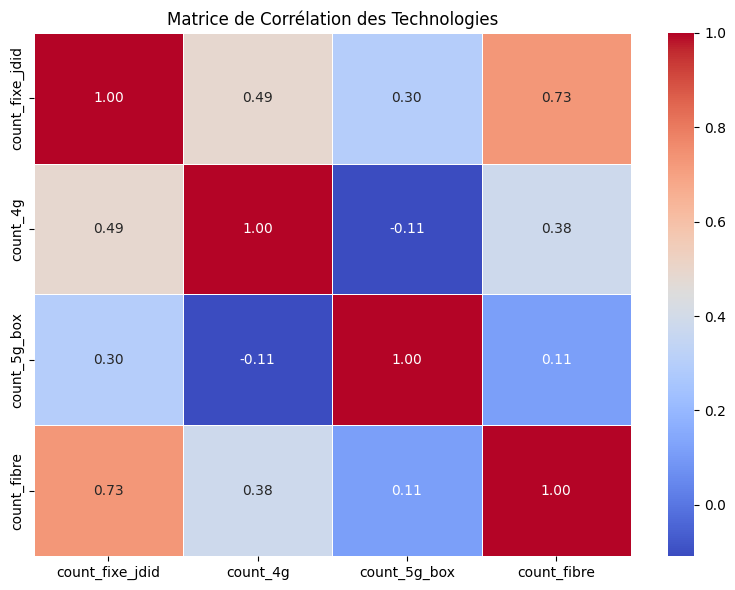

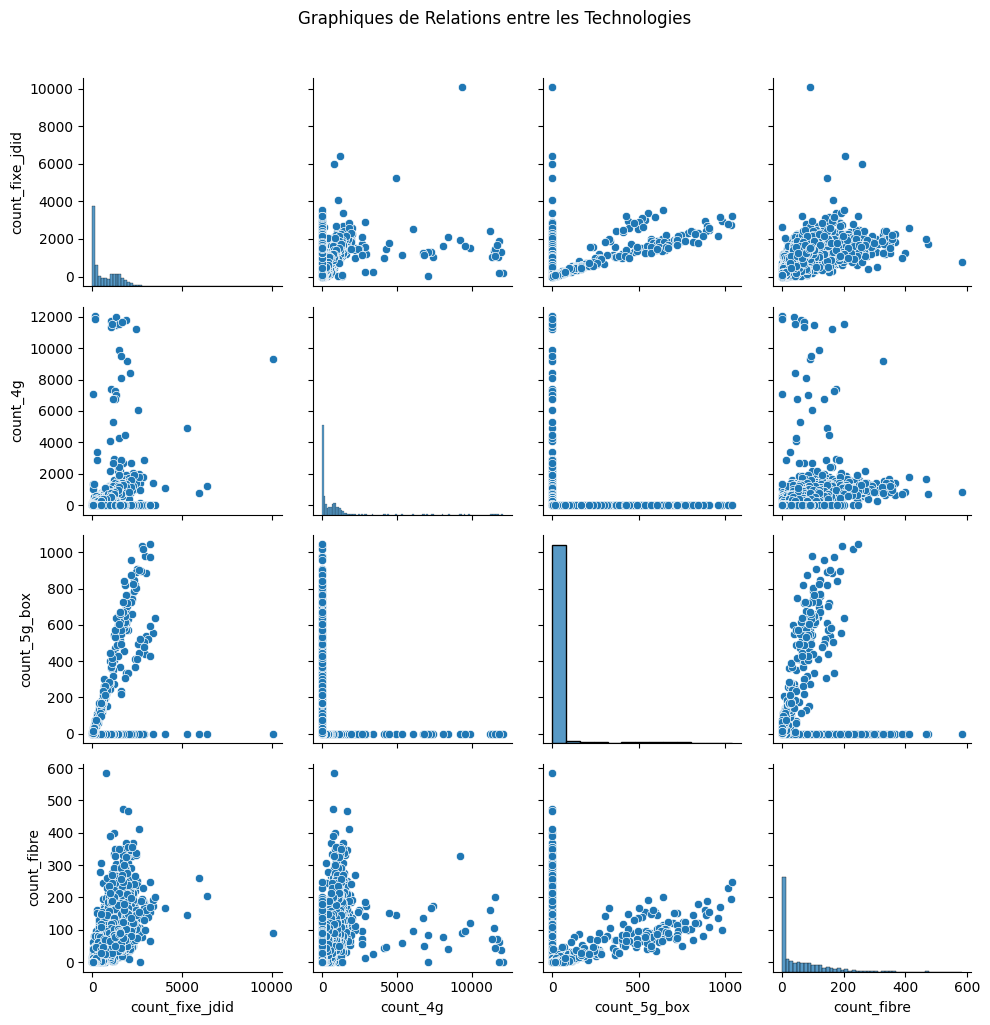


Résumé de la régression linéaire :
                            OLS Regression Results                            
Dep. Variable:        count_fixe_jdid   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     2059.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:46:00   Log-Likelihood:                -25353.
No. Observations:                3376   AIC:                         5.071e+04
Df Residuals:                    3372   BIC:                         5.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const       

In [26]:
!pip install seaborn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Charger la base de données avec les colonnes 'jour', 'heure' et 'count' pour chaque technologie
df = pd.read_csv("/home/fatma/Téléchargements/df_counts.csv", sep='|')  # Vérifier les colonnes
print("Colonnes du DataFrame :", df.columns)

# Convertir 'jour' en format datetime et gérer 'heure'
df['jour'] = pd.to_datetime(df['jour'], errors='coerce')
df['date_heure'] = df.apply(lambda row: pd.to_datetime(f"{row['jour'].date()} {int(row['heure'])}:00:00"), axis=1)

# Supprimer les lignes où la date ou les valeurs sont manquantes
df = df.dropna(subset=['date_heure', 'count_fibre', 'count_4g', 'count_fixe_jdid', 'count_5g_box'])

# Sélectionner les variables numériques
features = ['count_fixe_jdid', 'count_4g', 'count_5g_box', 'count_fibre']
df_features = df[features]

# 1. Matrice de corrélation
correlation_matrix = df_features.corr()
print("Matrice de corrélation :")
print(correlation_matrix)

# Tracer la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matrice de Corrélation des Technologies")
plt.tight_layout()
plt.show()

# 2. Pairplot pour visualiser les relations entre les variables
sns.pairplot(df_features)
plt.suptitle("Graphiques de Relations entre les Technologies", y=1.02)
plt.tight_layout()
plt.show()

# 3. Régression linéaire (par exemple, count_fixe_jdid en fonction de count_4g, count_fibre et count_5g_box)
import statsmodels.api as sm

# Définir la variable cible et les variables explicatives
X = df[['count_4g', 'count_fibre', 'count_5g_box']]  # Variables explicatives
y = df['count_fixe_jdid']  # Variable cible

# Ajouter une constante à X pour l'interception
X = sm.add_constant(X)

# Effectuer la régression linéaire
model = sm.OLS(y, X).fit()

# Résumé des résultats du modèle de régression
print("\nRésumé de la régression linéaire :")
print(model.summary())


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Charger les données (ajustez le chemin si nécessaire)
df = pd.read_csv("/home/fatma/Téléchargements/df_counts.csv", sep='|')

# Convertir 'jour' en format datetime et gérer 'heure'
df['jour'] = pd.to_datetime(df['jour'], errors='coerce')
df['date_heure'] = df.apply(lambda row: pd.to_datetime(f"{row['jour'].date()} {int(row['heure'])}:00:00"), axis=1)

# Supprimer les lignes avec des valeurs manquantes
df = df.dropna(subset=['date_heure', 'count_fibre', 'count_4g', 'count_fixe_jdid', 'count_5g_box'])

# Afficher les premières lignes pour vérifier le format
print(df.head())

# Traitement des valeurs manquantes (exemple : remplissage avec la moyenne)
df['count_fixe_jdid'].fillna(df['count_fixe_jdid'].mean(), inplace=True)
df['count_4g'].fillna(df['count_4g'].mean(), inplace=True)
df['count_fibre'].fillna(df['count_fibre'].mean(), inplace=True)
df['count_5g_box'].fillna(df['count_5g_box'].mean(), inplace=True)

# Anomalies et valeurs aberrantes (outliers) : on peut utiliser l'IQR pour les détecter
Q1 = df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']].quantile(0.25)
Q3 = df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] < (Q1 - 1.5 * IQR)) | 
          (df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Extraire des caractéristiques temporelles supplémentaires (jour de la semaine, mois, heure)
df['jour_semaine'] = df['date_heure'].dt.dayofweek
df['mois'] = df['date_heure'].dt.month
df['heure'] = df['date_heure'].dt.hour

# Liste des technologies
technologies = ['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']


# Visualisation des séries temporelles pour chaque technologie
# Affichage du DataFrame final après prétraitement
print(df.head())
# Sauvegarder le DataFrame prétraité dans un fichier CSV
df.to_csv("/home/fatma/Téléchargements/df_counts_preprocessed.csv", index=False)

print("Fichier prétraité sauvegardé sous 'df_counts_preprocessed.csv'")


        jour  heure  count_fixe_jdid  count_4g  count_5g_box  count_fibre  \
0 2024-09-04   21.0               14        19             0           20   
1 2024-09-04   22.0               22        91             0            0   
2 2024-09-05    6.0                8        24             0            0   
3 2024-09-05    7.0              101       130             0            0   
4 2024-09-05    8.0              456       450             0          105   

           date_heure  
0 2024-09-04 21:00:00  
1 2024-09-04 22:00:00  
2 2024-09-05 06:00:00  
3 2024-09-05 07:00:00  
4 2024-09-05 08:00:00  
        jour  heure  count_fixe_jdid  count_4g  count_5g_box  count_fibre  \
0 2024-09-04     21               14        19             0           20   
1 2024-09-04     22               22        91             0            0   
2 2024-09-05      6                8        24             0            0   
3 2024-09-05      7              101       130             0            0   
4 2024-0

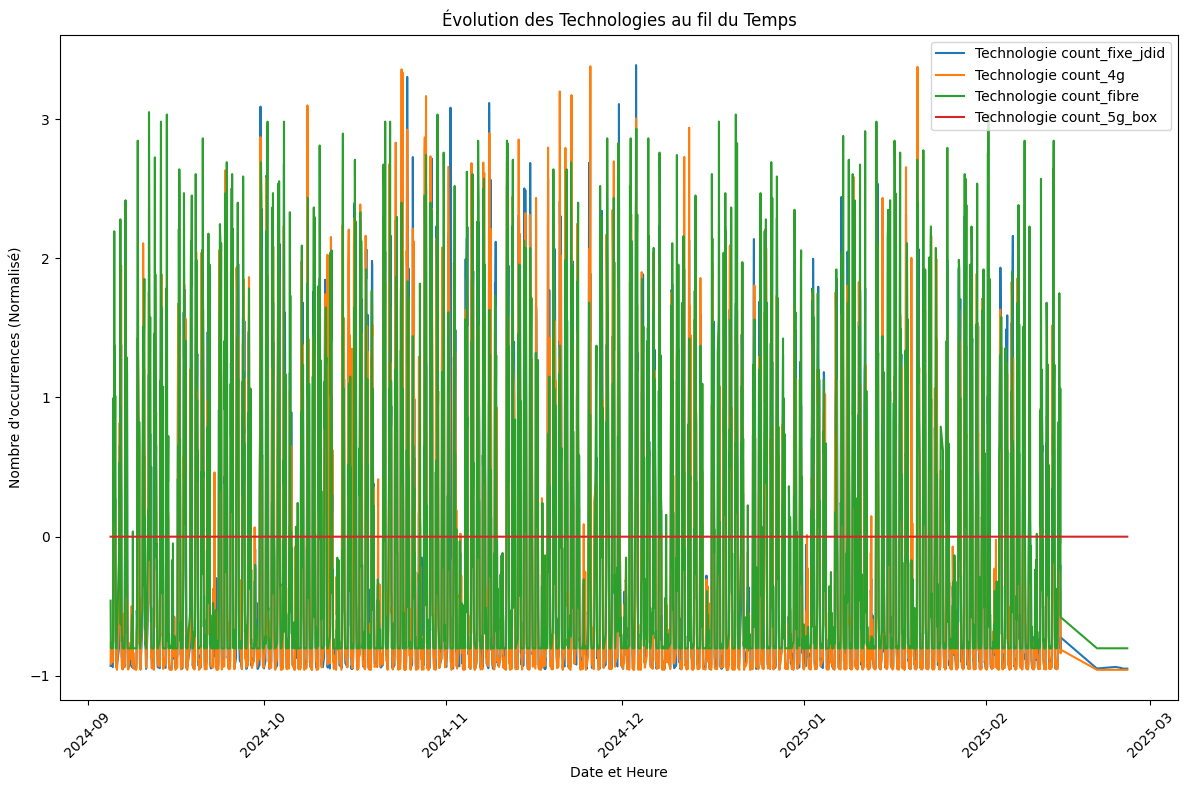

Fichier prétraité sauvegardé sous 'df_counts_preprocessing.csv'


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Charger les données (ajustez le chemin si nécessaire)
df = pd.read_csv("/home/fatma/Téléchargements/df_counts.csv", sep='|')

# Convertir 'jour' en format datetime et gérer 'heure'
df['jour'] = pd.to_datetime(df['jour'], errors='coerce')
df['date_heure'] = df.apply(lambda row: pd.to_datetime(f"{row['jour'].date()} {int(row['heure'])}:00:00"), axis=1)

# Supprimer les lignes avec des valeurs manquantes dans les colonnes essentielles
df = df.dropna(subset=['date_heure', 'count_fibre', 'count_4g', 'count_fixe_jdid', 'count_5g_box'])

# Vérification des doublons
df = df.drop_duplicates()

# Anomalies et valeurs aberrantes (outliers) : on peut utiliser l'IQR pour les détecter
Q1 = df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']].quantile(0.25)
Q3 = df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] < (Q1 - 1.5 * IQR)) | 
          (df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Traitement des valeurs manquantes (utilisation de SimpleImputer)
imputer = SimpleImputer(strategy='median')  # Utilisation de la médiane pour imputer les valeurs manquantes
df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] = imputer.fit_transform(df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']])

# Extraire des caractéristiques temporelles supplémentaires
df['jour_semaine'] = df['date_heure'].dt.dayofweek
df['mois'] = df['date_heure'].dt.month
df['heure'] = df['date_heure'].dt.hour
df['jour_de_l_annee'] = df['date_heure'].dt.dayofyear  # Jour de l'année pour capturer la saisonnalité

# Normalisation des données pour les technologies
scaler = StandardScaler()
df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']] = scaler.fit_transform(df[['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']])

# Visualisation des séries temporelles pour chaque technologie
plt.figure(figsize=(12, 8))

technologies = ['count_fixe_jdid', 'count_4g', 'count_fibre', 'count_5g_box']
for tech in technologies:
    plt.plot(df['date_heure'], df[tech], label=f"Technologie {tech}")

plt.xlabel("Date et Heure")
plt.ylabel("Nombre d'occurrences (Normalisé)")
plt.title("Évolution des Technologies au fil du Temps")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Sauvegarder le DataFrame prétraité dans un fichier CSV
df.to_csv("/home/fatma/Téléchargements/df_counts_preprocessing.csv", index=False)

print("Fichier prétraité sauvegardé sous 'df_counts_preprocessing.csv'")
